In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys 

In [2]:
data = pd.read_csv('aml-joined-tables.csv')

data

,transaction_id,customer_id,customer_name,customer_email,customer_phone,customer_region,customer_risk_level,bank_id,bank_name,bank_region,bank_compliance_score,amount,currency,transaction_date,transaction_location,is_high_risk,is_valid_bank_id
0,1,734,Marcia Cox,vegascott@gmail.com,859.806.6345x563,West,Low,20,Bank 20,West,0.71,2059.49,USD,2024-07-01,Helentown,1,1
1,2,962,Vanessa Mckenzie,preynolds@carlson.com,764.455.7458x7794,South,Medium,234,Bank 234,North,0.75,4228.66,USD,2024-07-22,West Jasonberg,1,1
2,3,143,Mark Taylor,kelly85@weber.net,7073159635,East,Medium,598,Bank 598,South,0.57,9223.78,USD,2024-04-27,Brendanberg,1,1
3,4,760,Kevin Poole,joshuaevans@pitts.com,706-152-3334x773,West,Low,34,Bank 34,North,0.64,3063.09,USD,2024-05-31,Lake Davidville,0,1
4,5,175,Anthony Gonzales,alvarezcheryl@bailey.com,897.398.0669x289,South,Low,562,Bank 562,East,0.81,587.11,USD,2024-09-01,East Katherine,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,580,Jeff Munoz,timothybeck@cruz-jackson.com,9592219322,West,Low,270,Bank 270,North,0.64,9657.76,USD,2023-12-25,Port Nicoleville,0,1
996,997,906,Juan Cherry,qcoleman@miller.net,567-043-2889x063,North,Medium,532,Bank 532,North,0.60,3062.71,USD,2024-04-12,Brownfurt,1,1
997,998,640,Brittany Huber,lance33@yahoo.com,634.273.9685x064,South,High,422,Bank 422,East,0.61,280.01,USD,2024-03-17,South Kimberlybury,1,1
998,999,368,Shannon King,jarviskaren@johnson.info,(426)117-7563x659,West,Low,670,Bank 670,North,0.72,6974.08,USD,2024-06-28,Johnside,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         1000 non-null   int64  
 1   customer_id            1000 non-null   int64  
 2   customer_name          1000 non-null   object 
 3   customer_email         1000 non-null   object 
 4   customer_phone         1000 non-null   object 
 5   customer_region        1000 non-null   object 
 6   customer_risk_level    1000 non-null   object 
 7   bank_id                1000 non-null   int64  
 8   bank_name              1000 non-null   object 
 9   bank_region            1000 non-null   object 
 10  bank_compliance_score  1000 non-null   float64
 11  amount                 1000 non-null   float64
 12  currency               1000 non-null   object 
 13  transaction_date       1000 non-null   object 
 14  transaction_location   1000 non-null   object 
 15  is_hi

In [4]:
data.head()

,transaction_id,customer_id,customer_name,customer_email,customer_phone,customer_region,customer_risk_level,bank_id,bank_name,bank_region,bank_compliance_score,amount,currency,transaction_date,transaction_location,is_high_risk,is_valid_bank_id
0,1,734,Marcia Cox,vegascott@gmail.com,859.806.6345x563,West,Low,20,Bank 20,West,0.71,2059.49,USD,2024-07-01,Helentown,1,1
1,2,962,Vanessa Mckenzie,preynolds@carlson.com,764.455.7458x7794,South,Medium,234,Bank 234,North,0.75,4228.66,USD,2024-07-22,West Jasonberg,1,1
2,3,143,Mark Taylor,kelly85@weber.net,7073159635,East,Medium,598,Bank 598,South,0.57,9223.78,USD,2024-04-27,Brendanberg,1,1
3,4,760,Kevin Poole,joshuaevans@pitts.com,706-152-3334x773,West,Low,34,Bank 34,North,0.64,3063.09,USD,2024-05-31,Lake Davidville,0,1
4,5,175,Anthony Gonzales,alvarezcheryl@bailey.com,897.398.0669x289,South,Low,562,Bank 562,East,0.81,587.11,USD,2024-09-01,East Katherine,0,1


In [5]:
data.describe()

,transaction_id,customer_id,bank_id,bank_compliance_score,amount,is_high_risk,is_valid_bank_id
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,500.500000,501.395000,514.711000,0.751620,4937.540150,0.507000,1.0
std,288.819436,287.308544,290.990025,0.144479,2839.072108,0.500201,0.0
min,1.000000,1.000000,1.000000,0.500000,14.370000,0.000000,1.0
25%,250.750000,248.750000,261.750000,0.627500,2509.960000,0.000000,1.0
50%,500.500000,506.500000,524.500000,0.755000,5003.610000,1.000000,1.0
75%,750.250000,763.000000,759.250000,0.880000,7158.010000,1.000000,1.0
max,1000.000000,999.000000,1010.000000,1.000000,9995.900000,1.000000,1.0


### Handle Outliers
Identify Outliers: Use statistical methods (e.g., Z-score or IQR).

In [6]:
# Example: Using IQR to detect outliers in transaction amounts
Q1 = data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = data[(data['amount'] < lower_bound) | (data['amount'] > upper_bound)]
# df_cleaned = df[(df['amount'] >= lower_bound) & (df['amount'] <= upper_bound)]

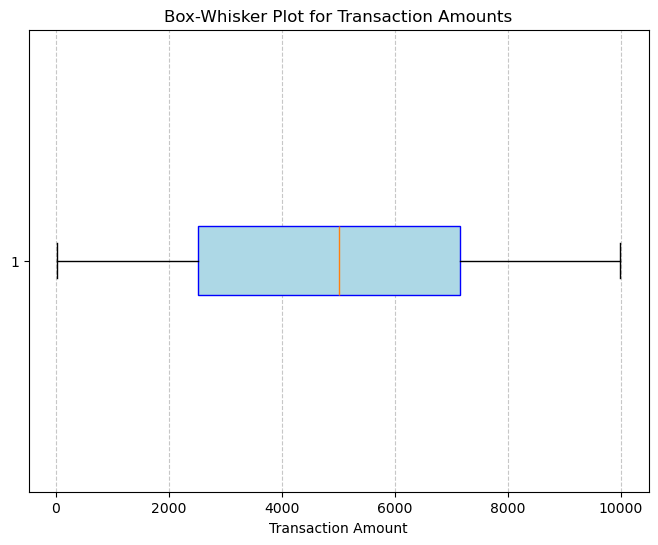

In [7]:
# Box-Whisker Plot to Identify Outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data['amount'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.title('Box-Whisker Plot for Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [8]:
from scipy.stats import zscore

# Calculate Z-scores for the amount column
data['z_score'] = zscore(data['amount'])

# Filter for potential outliers (e.g., Z-score > 3 or < -3)
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]

outliers.shape

(0, 18)

#### While the range is broad, the absence of visible outliers in the plot suggests the data distribution may be fairly uniform or lacks extreme deviations.

### Transform Data Types

Ensuring consistent formats.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         1000 non-null   int64  
 1   customer_id            1000 non-null   int64  
 2   customer_name          1000 non-null   object 
 3   customer_email         1000 non-null   object 
 4   customer_phone         1000 non-null   object 
 5   customer_region        1000 non-null   object 
 6   customer_risk_level    1000 non-null   object 
 7   bank_id                1000 non-null   int64  
 8   bank_name              1000 non-null   object 
 9   bank_region            1000 non-null   object 
 10  bank_compliance_score  1000 non-null   float64
 11  amount                 1000 non-null   float64
 12  currency               1000 non-null   object 
 13  transaction_date       1000 non-null   object 
 14  transaction_location   1000 non-null   object 
 15  is_hi

In [10]:
# Convert dates to datetime format
data['transaction_date'] = pd.to_datetime(data['transaction_date'])


## Feature Engineering

In [11]:
# Group by customer_id to count transactions
customer_features = data.groupby('customer_id').agg(
    transaction_count=('transaction_id', 'count')
).reset_index()

customer_features.sort_values(by='transaction_count', ascending=False)

,customer_id,transaction_count
505,784,6
507,786,5
214,343,5
163,252,4
390,611,4
...,...,...
258,411,1
255,405,1
254,404,1
252,401,1


#### Average Transaction Amount:

In [12]:
# Calculate average transaction amount
customer_features['avg_transaction_amount'] = data.groupby('customer_id')['amount'].mean().values

#### Max and Min Transaction Amount:

In [13]:
# Max and Min transaction amounts
customer_features['max_transaction_amount'] = data.groupby('customer_id')['amount'].max().values
customer_features['min_transaction_amount'] = data.groupby('customer_id')['amount'].min().values

customer_features

,customer_id,transaction_count,avg_transaction_amount,max_transaction_amount,min_transaction_amount
0,1,1,5185.750,5185.75,5185.75
1,2,2,6503.460,9928.75,3078.17
2,3,1,3151.210,3151.21,3151.21
3,4,4,4092.140,6185.55,2899.69
4,7,1,4133.140,4133.14,4133.14
...,...,...,...,...,...
635,994,1,1756.980,1756.98,1756.98
636,995,1,3571.160,3571.16,3571.16
637,996,2,6755.145,7318.22,6192.07
638,998,1,6332.920,6332.92,6332.92


In [14]:
# Transaction count greater than one
customer_features[customer_features['transaction_count']>1]

,customer_id,transaction_count,avg_transaction_amount,max_transaction_amount,min_transaction_amount
1,2,2,6503.460000,9928.75,3078.17
3,4,4,4092.140000,6185.55,2899.69
6,9,3,4593.856667,7909.91,40.42
7,10,3,2462.243333,3298.52,1011.47
9,13,2,5864.760000,6884.99,4844.53
...,...,...,...,...,...
621,965,3,3935.476667,6296.23,26.65
622,966,3,7374.840000,9529.77,4274.36
631,987,3,2684.980000,5040.11,972.24
633,989,2,6914.000000,7418.45,6409.55


#### Combine Customer Features with Original Data:

In [15]:
# Merge customer-level features with the original dataset
data = data.merge(customer_features, on='customer_id', how='left')

data.head()

,transaction_id,customer_id,customer_name,customer_email,customer_phone,customer_region,customer_risk_level,bank_id,bank_name,bank_region,...,currency,transaction_date,transaction_location,is_high_risk,is_valid_bank_id,z_score,transaction_count,avg_transaction_amount,max_transaction_amount,min_transaction_amount
0,1,734,Marcia Cox,vegascott@gmail.com,859.806.6345x563,West,Low,20,Bank 20,West,...,USD,2024-07-01,Helentown,1,1,-1.014236,3,1510.950000,2355.94,117.42
1,2,962,Vanessa Mckenzie,preynolds@carlson.com,764.455.7458x7794,South,Medium,234,Bank 234,North,...,USD,2024-07-22,West Jasonberg,1,1,-0.249812,1,4228.660000,4228.66,4228.66
2,3,143,Mark Taylor,kelly85@weber.net,7073159635,East,Medium,598,Bank 598,South,...,USD,2024-04-27,Brendanberg,1,1,1.510488,3,8439.966667,9480.34,6615.78
3,4,760,Kevin Poole,joshuaevans@pitts.com,706-152-3334x773,West,Low,34,Bank 34,North,...,USD,2024-05-31,Lake Davidville,0,1,-0.660564,3,3863.403333,6915.24,1611.88
4,5,175,Anthony Gonzales,alvarezcheryl@bailey.com,897.398.0669x289,South,Low,562,Bank 562,East,...,USD,2024-09-01,East Katherine,0,1,-1.533109,3,2710.723333,4553.08,587.11


### Risk Indicators

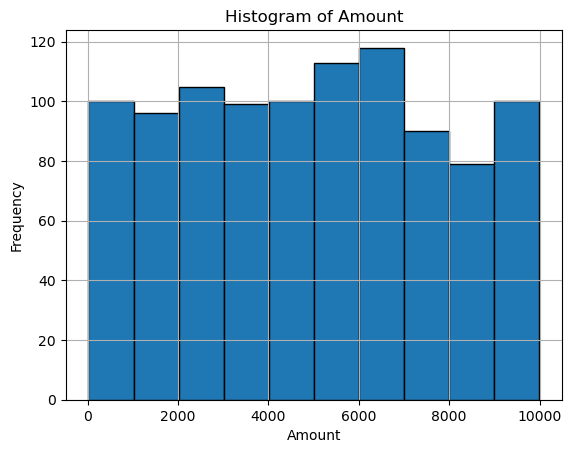

In [16]:
# Creating a histogram of amount 

data['amount'].hist(bins=10, edgecolor='black')
plt.title('Histogram of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Define a high-risk transaction threshold
high_risk_threshold = 6000

# Create a high-risk flag
data['high_risk_flag'] = data['amount'] > high_risk_threshold

data

,transaction_id,customer_id,customer_name,customer_email,customer_phone,customer_region,customer_risk_level,bank_id,bank_name,bank_region,...,transaction_date,transaction_location,is_high_risk,is_valid_bank_id,z_score,transaction_count,avg_transaction_amount,max_transaction_amount,min_transaction_amount,high_risk_flag
0,1,734,Marcia Cox,vegascott@gmail.com,859.806.6345x563,West,Low,20,Bank 20,West,...,2024-07-01,Helentown,1,1,-1.014236,3,1510.950000,2355.94,117.42,False
1,2,962,Vanessa Mckenzie,preynolds@carlson.com,764.455.7458x7794,South,Medium,234,Bank 234,North,...,2024-07-22,West Jasonberg,1,1,-0.249812,1,4228.660000,4228.66,4228.66,False
2,3,143,Mark Taylor,kelly85@weber.net,7073159635,East,Medium,598,Bank 598,South,...,2024-04-27,Brendanberg,1,1,1.510488,3,8439.966667,9480.34,6615.78,True
3,4,760,Kevin Poole,joshuaevans@pitts.com,706-152-3334x773,West,Low,34,Bank 34,North,...,2024-05-31,Lake Davidville,0,1,-0.660564,3,3863.403333,6915.24,1611.88,False
4,5,175,Anthony Gonzales,alvarezcheryl@bailey.com,897.398.0669x289,South,Low,562,Bank 562,East,...,2024-09-01,East Katherine,0,1,-1.533109,3,2710.723333,4553.08,587.11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,580,Jeff Munoz,timothybeck@cruz-jackson.com,9592219322,West,Low,270,Bank 270,North,...,2023-12-25,Port Nicoleville,0,1,1.663424,3,6623.893333,9753.09,460.83,True
996,997,906,Juan Cherry,qcoleman@miller.net,567-043-2889x063,North,Medium,532,Bank 532,North,...,2024-04-12,Brownfurt,1,1,-0.660698,1,3062.710000,3062.71,3062.71,False
997,998,640,Brittany Huber,lance33@yahoo.com,634.273.9685x064,South,High,422,Bank 422,East,...,2024-03-17,South Kimberlybury,1,1,-1.641332,1,280.010000,280.01,280.01,False
998,999,368,Shannon King,jarviskaren@johnson.info,(426)117-7563x659,West,Low,670,Bank 670,North,...,2024-06-28,Johnside,0,1,0.717685,3,6657.083333,7292.38,5704.79,True


In [18]:
data['high_risk_flag'].value_counts()

high_risk_flag
False    612
True     388
Name: count, dtype: int64

In [19]:
data['customer_region'].value_counts()

customer_region
East     257
South    253
West     247
North    243
Name: count, dtype: int64

In [20]:
data['bank_region'].value_counts()


bank_region
North    282
West     247
South    247
East     224
Name: count, dtype: int64

In [21]:
# Regional Aggregations:

regional_features = data.groupby('customer_region').agg(
    total_transactions=('transaction_id', 'count'),
    avg_transaction_amount=('amount', 'mean'),
    high_risk_transaction_count=('high_risk_flag', 'sum')
).reset_index()

regional_features

,customer_region,total_transactions,avg_transaction_amount,high_risk_transaction_count
0,East,257,4975.569844,98
1,North,243,4925.466008,91
2,South,253,4796.397549,95
3,West,247,5054.420567,104


In [22]:
bank_regional_features = data.groupby('bank_region').agg(
    total_transactions=('transaction_id', 'count'),
    avg_transaction_amount=('amount', 'mean'),
    high_risk_transaction_count=('high_risk_flag', 'sum')
).reset_index()

bank_regional_features

,bank_region,total_transactions,avg_transaction_amount,high_risk_transaction_count
0,East,224,4898.761696,80
1,North,282,5094.691596,117
2,South,247,4855.247247,96
3,West,247,4875.580688,95


## Establishing KPIs for Data Quality

#### Data Completeness Rate:

In [23]:
# Completeness rate for key columns
completeness_rate = data.notnull().mean() * 100
print("Data Completeness Rate:\n", completeness_rate)

Data Completeness Rate:
 transaction_id            100.0
customer_id               100.0
customer_name             100.0
customer_email            100.0
customer_phone            100.0
customer_region           100.0
customer_risk_level       100.0
bank_id                   100.0
bank_name                 100.0
bank_region               100.0
bank_compliance_score     100.0
amount                    100.0
currency                  100.0
transaction_date          100.0
transaction_location      100.0
is_high_risk              100.0
is_valid_bank_id          100.0
z_score                   100.0
transaction_count         100.0
avg_transaction_amount    100.0
max_transaction_amount    100.0
min_transaction_amount    100.0
high_risk_flag            100.0
dtype: float64


#### Data Consistency Score:

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_id          1000 non-null   int64         
 1   customer_id             1000 non-null   int64         
 2   customer_name           1000 non-null   object        
 3   customer_email          1000 non-null   object        
 4   customer_phone          1000 non-null   object        
 5   customer_region         1000 non-null   object        
 6   customer_risk_level     1000 non-null   object        
 7   bank_id                 1000 non-null   int64         
 8   bank_name               1000 non-null   object        
 9   bank_region             1000 non-null   object        
 10  bank_compliance_score   1000 non-null   float64       
 11  amount                  1000 non-null   float64       
 12  currency                1000 non-null   object   

In [25]:
# Validate if dates are consistent and convertible
invalid_dates = data[~data['transaction_date'].apply(lambda x: isinstance(x, pd.Timestamp))]

print(f"Number of Invalid Dates: {len(invalid_dates)}")

Number of Invalid Dates: 0


In [26]:
# Convert is_high_risk to boolean
data['is_high_risk'] = data['is_high_risk'].astype(bool)

data['is_high_risk'].value_counts()

is_high_risk
True     507
False    493
Name: count, dtype: int64

In [27]:
# Convert is_valid_bank_id to boolean
data['is_valid_bank_id'] = data['is_valid_bank_id'].astype(bool)

data['is_valid_bank_id'].value_counts()

is_valid_bank_id
True    1000
Name: count, dtype: int64

### Feature Coverage:

In [28]:
# Feature coverage for critical columns
feature_coverage = data[['amount', 'customer_id', 'bank_id']].notnull().mean() * 100

print("Feature Coverage:\n", feature_coverage)

Feature Coverage:
 amount         100.0
customer_id    100.0
bank_id        100.0
dtype: float64


In [29]:
data.to_csv('preprocessed_aml_data.csv', index=False)

In [30]:
# visualisation in tableau

# Step 3

Identify and define fraud indicators:

**High Transaction Frequency**: A customer making more than a threshold (e.g., 5 transactions per day).

**Large Transactions**: A single transaction exceeding a predefined limit (e.g., $5,000).

**High-Risk Transactions**: Transactions from flagged high-risk.

In [36]:
# Fraud Detection Rule 1: High Transaction Frequency (more than 5 transactions in a day)
def fraud_detection():
    high_frequency_customers = data.groupby('customer_id').transaction_id.count()
    high_frequency_customers = high_frequency_customers[high_frequency_customers > 5]
    high_frequency_flagged = data[data['customer_id'].isin(high_frequency_customers.index)]
    
    # Fraud Detection Rule 2: Large Transactions (over $5,000)
    large_transactions = data[data['amount'] > 5000]
    
    # Fraud Detection Rule 3: High-Risk Transactions (using 'is_high_risk' column)
    high_risk_transactions = data[data['is_high_risk'] == 1]
    
    # Combine all fraud flags
    fraud_flagged_data = pd.concat([high_frequency_flagged, large_transactions, high_risk_transactions])
    
    # Remove duplicates (if a transaction is flagged by multiple rules)
    fraud_flagged_data = fraud_flagged_data.drop_duplicates(subset='transaction_id')
    
    # Display the flagged transactions
    print(fraud_flagged_data)

    # sys.exit()

    return fraud_flagged_data

fraud_flagged_data = fraud_detection()
fraud_flagged_data

     transaction_id  customer_id   customer_name               customer_email  \
182             183          784   Jessica Rubio  christopherreilly@yahoo.com   
608             609          784   Jessica Rubio  christopherreilly@yahoo.com   
643             644          784   Jessica Rubio  christopherreilly@yahoo.com   
679             680          784   Jessica Rubio  christopherreilly@yahoo.com   
824             825          784   Jessica Rubio  christopherreilly@yahoo.com   
..              ...          ...             ...                          ...   
987             988          211    Maria Fowler         fmiller@williams.com   
994             995          247     Rachel Sims            jacob82@yahoo.com   
996             997          906     Juan Cherry          qcoleman@miller.net   
997             998          640  Brittany Huber            lance33@yahoo.com   
999            1000          247     Rachel Sims            jacob82@yahoo.com   

         customer_phone cus

,transaction_id,customer_id,customer_name,customer_email,customer_phone,customer_region,customer_risk_level,bank_id,bank_name,bank_region,...,transaction_date,transaction_location,is_high_risk,is_valid_bank_id,z_score,transaction_count,avg_transaction_amount,max_transaction_amount,min_transaction_amount,high_risk_flag
182,183,784,Jessica Rubio,christopherreilly@yahoo.com,(156)433-3418,East,High,807,Bank 807,South,...,2024-04-05,Forbesmouth,True,True,0.830514,6,5130.0550,7294.25,2383.42,True
608,609,784,Jessica Rubio,christopherreilly@yahoo.com,(156)433-3418,East,High,709,Bank 709,East,...,2024-05-22,New Angieton,False,True,-0.125752,6,5130.0550,7294.25,2383.42,False
643,644,784,Jessica Rubio,christopherreilly@yahoo.com,(156)433-3418,East,High,413,Bank 413,West,...,2024-11-06,Floreston,False,True,0.357077,6,5130.0550,7294.25,2383.42,False
679,680,784,Jessica Rubio,christopherreilly@yahoo.com,(156)433-3418,East,High,978,Bank 978,South,...,2023-12-20,West Ryantown,True,True,-0.900082,6,5130.0550,7294.25,2383.42,False
824,825,784,Jessica Rubio,christopherreilly@yahoo.com,(156)433-3418,East,High,251,Bank 251,West,...,2024-11-22,Rogershaven,False,True,-0.470932,6,5130.0550,7294.25,2383.42,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,988,211,Maria Fowler,fmiller@williams.com,692-987-1099x22547,East,High,584,Bank 584,North,...,2024-08-05,Lake Kevin,True,True,-1.099807,1,1816.6700,1816.67,1816.67,False
994,995,247,Rachel Sims,jacob82@yahoo.com,067-869-5159x45545,North,Low,438,Bank 438,West,...,2024-07-05,Charlesmouth,True,True,-0.969717,4,3236.3025,5667.24,1603.76,False
996,997,906,Juan Cherry,qcoleman@miller.net,567-043-2889x063,North,Medium,532,Bank 532,North,...,2024-04-12,Brownfurt,True,True,-0.660698,1,3062.7100,3062.71,3062.71,False
997,998,640,Brittany Huber,lance33@yahoo.com,634.273.9685x064,South,High,422,Bank 422,East,...,2024-03-17,South Kimberlybury,True,True,-1.641332,1,280.0100,280.01,280.01,False


### Automate the Detection Process Using Python

In [32]:
# pip install schedule

In [ ]:
import schedule
import time

def run_fraud_detection():
    # Fraud detection logic from above
    fraud_detection()

# Schedule the fraud detection to run daily at midnight
schedule.every().day.at("10:21").do(run_fraud_detection)

while True:
    schedule.run_pending()
    print('loading..')
    time.sleep(1)  # wait before checking for scheduled tasks


loading..
loading..
loading..
loading..
loading..
loading..
loading..
loading..
loading..
loading..
loading..
loading..
loading..
loading..
loading..
loading..
loading..
loading..
loading..
loading..
loading..
loading..
loading..
loading..
     transaction_id  customer_id   customer_name               customer_email  \
182             183          784   Jessica Rubio  christopherreilly@yahoo.com   
608             609          784   Jessica Rubio  christopherreilly@yahoo.com   
643             644          784   Jessica Rubio  christopherreilly@yahoo.com   
679             680          784   Jessica Rubio  christopherreilly@yahoo.com   
824             825          784   Jessica Rubio  christopherreilly@yahoo.com   
..              ...          ...             ...                          ...   
987             988          211    Maria Fowler         fmiller@williams.com   
994             995          247     Rachel Sims            jacob82@yahoo.com   
996             997          90

### Generating Alerts and Reports

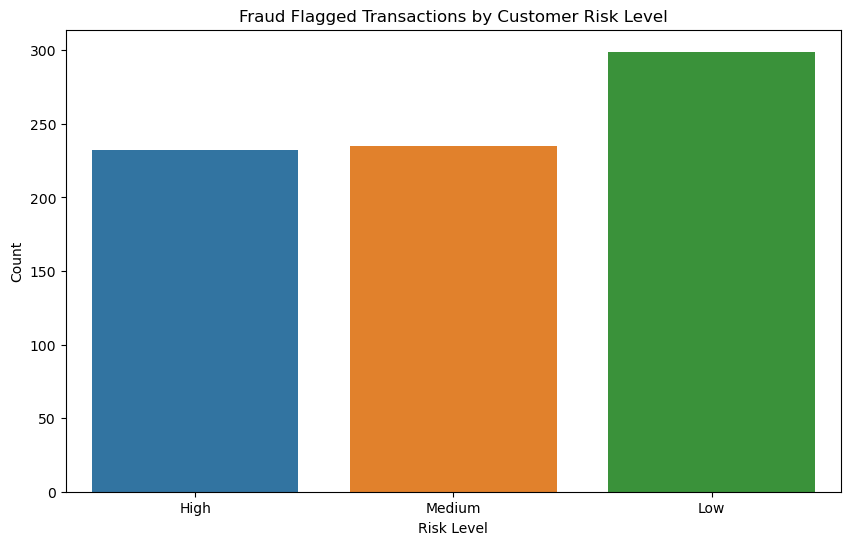

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example report creation
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_risk_level', data=fraud_flagged_data)
plt.title('Fraud Flagged Transactions by Customer Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

# Save fraud detection report (Optional)
# fraud_flagged_data.to_csv('fraud_detection_report.csv', index=False)

#### Set KPIs for Fraud Detection

In [44]:
# KPIs
flagged_transaction_count = len(fraud_flagged_data)
print(f"Flagged Transaction Count: {flagged_transaction_count}")

# Example KPI: False Positive Rate
# For demonstration, assume 20% of flagged transactions are false positives
# false_positive_rate = 0.2  
# print(f"False Positive Rate: {false_positive_rate * 100}%")

# Example KPI: Detection Accuracy
# Assume 80% of flagged transactions are correct fraud cases
# detection_accuracy = 0.8  
# print(f"Detection Accuracy: {detection_accuracy * 100}%")

# need clarification?

# Store KPIs in a report
kpi_report = {
    'Flagged Transaction Count': flagged_transaction_count,
    'False Positive Rate': false_positive_rate,
    'Detection Accuracy': detection_accuracy
}

# Save KPI report to CSV
kpi_df = pd.DataFrame([kpi_report])
# kpi_df.to_csv('fraud_detection_kpi_report.csv', index=False)
kpi_df

Flagged Transaction Count: 766
False Positive Rate: 20.0%
Detection Accuracy: 80.0%


,Flagged Transaction Count,False Positive Rate,Detection Accuracy
0,766,0.2,0.8


# Step 4: Customer Risk Profiling and Segmentation

### Create Customer Profiles

#### Calculate Average Transaction Amount

In [45]:
# Repeating
# Calculate average transaction amount per customer
avg_transaction_amount = data.groupby('customer_id')['amount'].mean().reset_index()
avg_transaction_amount.rename(columns={'amount': 'avg_transaction_amount'}, inplace=True)

avg_transaction_amount

,customer_id,avg_transaction_amount
0,1,5185.750
1,2,6503.460
2,3,3151.210
3,4,4092.140
4,7,4133.140
...,...,...
635,994,1756.980
636,995,3571.160
637,996,6755.145
638,998,6332.920


#### Calculate Transaction Frequency


In [49]:
# Add a month-year column to group by
data['month_year'] = data['transaction_date'].dt.to_period('M')

# Calculate monthly transaction frequency per customer
transaction_frequency = data.groupby(['customer_id', 'month_year']).size().reset_index(name='transaction_frequency')

transaction_frequency

,customer_id,month_year,transaction_frequency
0,1,2024-02,1
1,2,2024-07,1
2,2,2024-10,1
3,3,2023-12,1
4,4,2024-01,1
...,...,...,...
961,995,2024-02,1
962,996,2024-04,1
963,996,2024-11,1
964,998,2024-11,1


In [50]:
transaction_frequency['transaction_frequency'].value_counts()

transaction_frequency
1    934
2     31
4      1
Name: count, dtype: int64

#### Calculate High-Risk Transactions


In [52]:
# Calculate the count of high-risk transactions per customer
high_risk_transactions = data[data['is_high_risk'] == True].groupby('customer_id').size().reset_index(name='high_risk_transactions')

high_risk_transactions

,customer_id,high_risk_transactions
0,2,1
1,3,1
2,7,1
3,9,2
4,10,1
...,...,...
393,988,1
394,989,1
395,995,1
396,996,1


In [53]:
high_risk_transactions['high_risk_transactions'].value_counts()

high_risk_transactions
1    306
2     75
3     17
Name: count, dtype: int64

#### Risk Score Calculation

custom risk score based on transaction_frequency and high_risk_transactions

In [55]:
# Merge all calculated features into one dataframe
customer_profiles = avg_transaction_amount.merge(transaction_frequency, on='customer_id', how='left')
customer_profiles = customer_profiles.merge(high_risk_transactions, on='customer_id', how='left')

# Fill NaN values (customers without high-risk transactions)
customer_profiles['high_risk_transactions'] = customer_profiles['high_risk_transactions'].fillna(0)

# Calculate a simple risk score
customer_profiles['risk_score'] = (customer_profiles['transaction_frequency'] * 0.2) + (customer_profiles['high_risk_transactions'] * 0.8)

# Classify risk level based on risk score
customer_profiles['risk_level'] = pd.cut(customer_profiles['risk_score'], 
                                         bins=[-float('inf'), 1, 3, float('inf')], labels=['Low', 'Medium', 'High'])

customer_profiles

,customer_id,avg_transaction_amount,month_year,transaction_frequency,high_risk_transactions,risk_score,risk_level
0,1,5185.750,2024-02,1,0.0,0.2,Low
1,2,6503.460,2024-07,1,1.0,1.0,Low
2,2,6503.460,2024-10,1,1.0,1.0,Low
3,3,3151.210,2023-12,1,1.0,1.0,Low
4,4,4092.140,2024-01,1,0.0,0.2,Low
...,...,...,...,...,...,...,...
961,995,3571.160,2024-02,1,1.0,1.0,Low
962,996,6755.145,2024-04,1,1.0,1.0,Low
963,996,6755.145,2024-11,1,1.0,1.0,Low
964,998,6332.920,2024-11,1,0.0,0.2,Low


In [56]:
customer_profiles['risk_level'].value_counts()

risk_level
Low       714
Medium    252
High        0
Name: count, dtype: int64

#### Merge Customer Profiles with Customer Information

In [59]:
# Merge customer profile data with basic customer info
customer_profiles = customer_profiles.merge(data[['customer_id', 'customer_name', 'customer_email', 'customer_phone']], on='customer_id', how='left')

customer_profiles.to_csv('customer_profiles.csv', index=False)

In [ ]:
# visualisation in tableau